In [4]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [6]:
import tensorflow as tf
import numpy as np

# Define constants
IMAGE_SIZE = 224
BATCH_SIZE = 32
train_directory = r'C:\Users\Dell\Downloads\archive (1)--\QR codes\Dataset major project\Training'
test_directory = r'C:\Users\Dell\Downloads\archive (1)--\QR codes\Dataset major project\Testing'
validation_directory = r'C:\Users\Dell\Downloads\archive (1)--\QR codes\Dataset major project\Validation'

# Load training dataset from directory
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_directory,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    color_mode="grayscale"  # Remove label_mode='binary'
)

# Load testing dataset from directory
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_directory,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    color_mode="grayscale"  # Remove label_mode='binary'
)

# Load validation dataset from directory
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    validation_directory,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    color_mode="grayscale"  # Remove label_mode='binary'
)

# Flatten labels
train_labels_flat = np.concatenate([labels.numpy() for _, labels in train_dataset], axis=0)
test_labels_flat = np.concatenate([labels.numpy() for _, labels in test_dataset], axis=0)
validation_labels_flat = np.concatenate([labels.numpy() for _, labels in validation_dataset], axis=0)

# Print shapes of flattened labels
print("Shape of flattened training labels:", train_labels_flat.shape)
print("Shape of flattened testing labels:", test_labels_flat.shape)
print("Shape of flattened validation labels:", validation_labels_flat.shape)



Found 7000 files belonging to 2 classes.
Found 1500 files belonging to 2 classes.
Found 1500 files belonging to 2 classes.
Shape of flattened training labels: (7000,)
Shape of flattened testing labels: (1500,)
Shape of flattened validation labels: (1500,)


In [7]:
for i, (image_batch, labels_batch) in enumerate(train_dataset):
    print("Batch", i+1)
    print("Image batch shape:", image_batch.shape)
    print("Labels batch shape:", labels_batch.shape)
    print("Labels batch:", labels_batch)
    # Do something with the image and label batches
    if i == 0:
        break  # Stop after printing the first batch


Batch 1
Image batch shape: (32, 224, 224, 1)
Labels batch shape: (32,)
Labels batch: tf.Tensor([1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1], shape=(32,), dtype=int32)


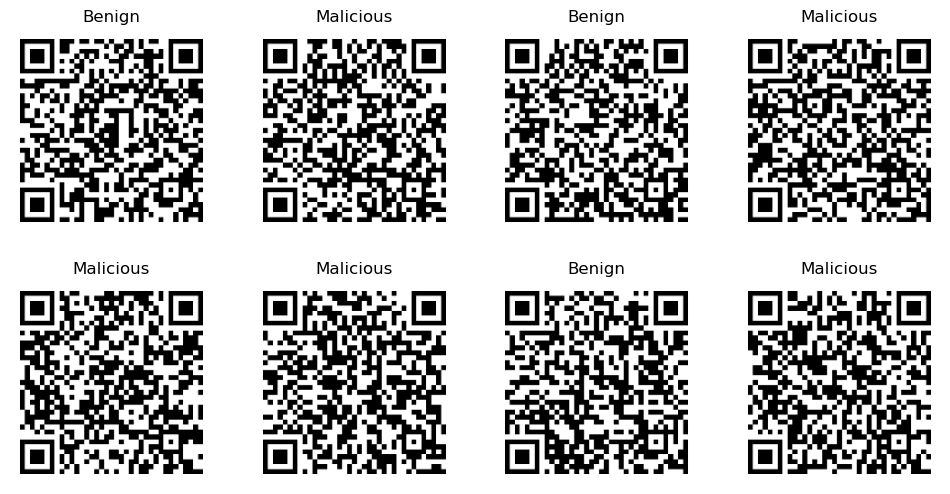

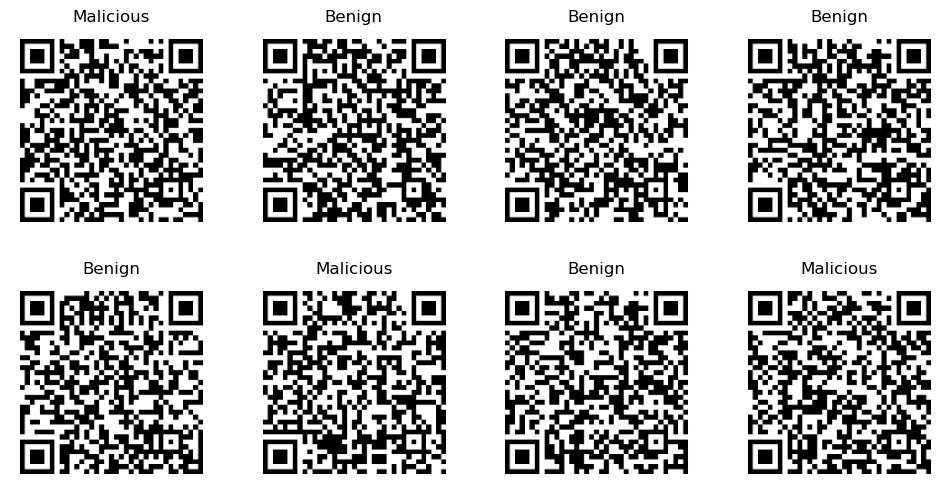

In [18]:
import matplotlib.pyplot as plt

# Create an iterator for the dataset
train_iterator = iter(train_dataset)
test_iterator = iter(test_dataset)

# Get a batch of training data
sample_images, sample_labels = next(train_iterator)

# Visualize a few training images
plt.figure(figsize=(12, 6))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(sample_images[i], cmap='gray')  # Set the colormap to 'gray'
    if sample_labels[i] == 1:
        plt.title("Benign")
    else:
        plt.title("Malicious")
    plt.axis('off')
plt.show()

# Get a batch of testing data
sample_images, sample_labels = next(test_iterator)

# Visualize a few testing images
plt.figure(figsize=(12, 6))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(sample_images[i], cmap='gray')  # Set the colormap to 'gray'
    if sample_labels[i] == 1:
        plt.title("Benign")
    else:
        plt.title("Malicious")
    plt.axis('off')
plt.show()


In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Define the model architecture
model = models.Sequential([
    # Input layer (Rescaling layer not needed in code as it's applied during preprocessing)
    layers.Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(224, 224, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Assuming 2 output classes
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 56, 56, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

In [10]:
# Import EarlyStopping callback
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss for early stopping
    patience=5,           # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore the weights of the best epoch
)

# Train the model with early stopping
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=30,
    callbacks=[early_stopping]  # Pass the EarlyStopping callback
)

# After training, you can evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


Epoch 1/30
219/219 [==============================] - 98s 443ms/step - loss: 8.1827 - accuracy: 0.8161 - val_loss: 0.1141 - val_accuracy: 0.9553
Epoch 2/30
219/219 [==============================] - 99s 453ms/step - loss: 0.1397 - accuracy: 0.9474 - val_loss: 0.0684 - val_accuracy: 0.9773
Epoch 3/30
219/219 [==============================] - 98s 445ms/step - loss: 0.0776 - accuracy: 0.9713 - val_loss: 0.0391 - val_accuracy: 0.9860
Epoch 4/30
219/219 [==============================] - 95s 434ms/step - loss: 0.0489 - accuracy: 0.9830 - val_loss: 0.0322 - val_accuracy: 0.9900
Epoch 5/30
219/219 [==============================] - 112s 509ms/step - loss: 0.0437 - accuracy: 0.9831 - val_loss: 0.0210 - val_accuracy: 0.9940
Epoch 6/30
219/219 [==============================] - 113s 514ms/step - loss: 0.0383 - accuracy: 0.9880 - val_loss: 0.0303 - val_accuracy: 0.9873
Epoch 7/30
219/219 [==============================] - 113s 517ms/step - loss: 0.0279 - accuracy: 0.9890 - val_loss: 0.0094 - val

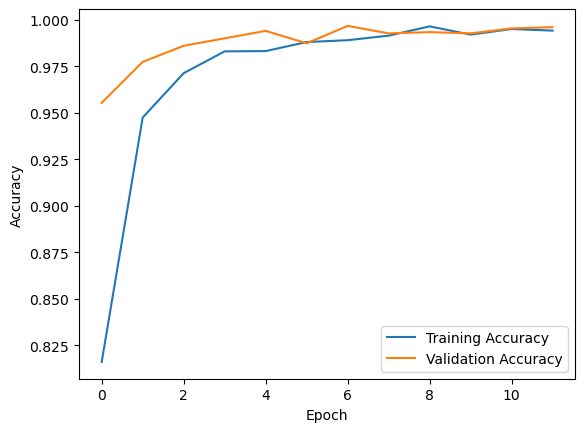

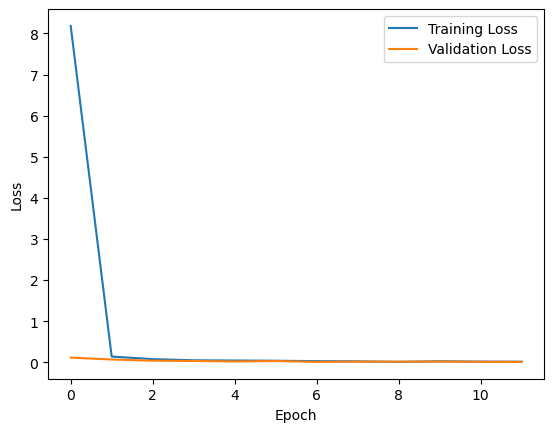

In [11]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [12]:
model.save('april23th.h5')


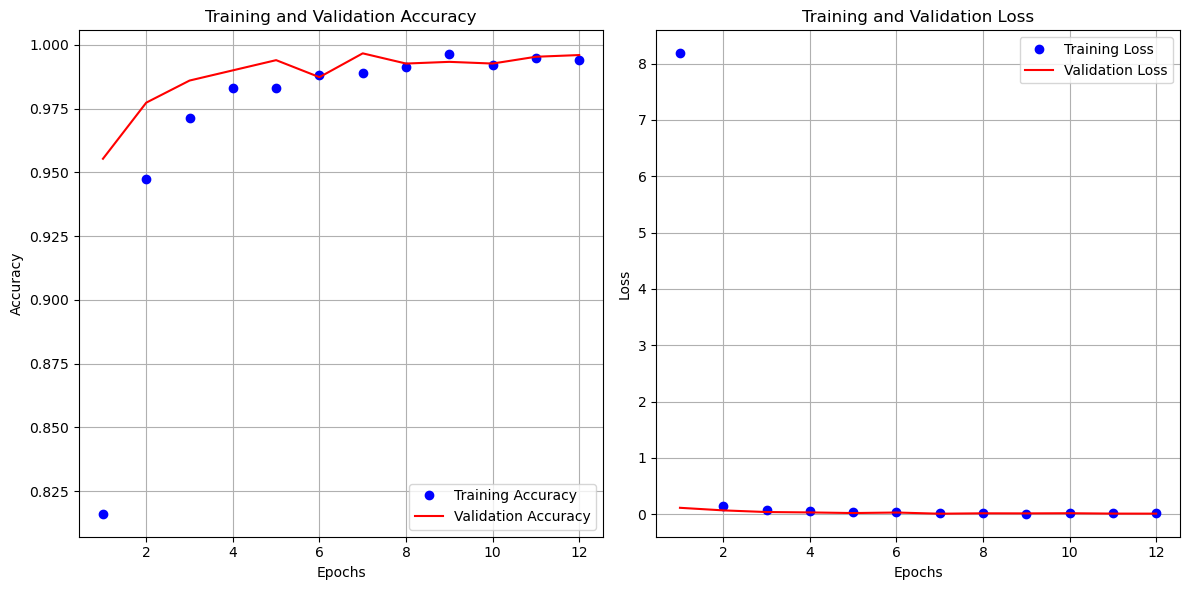

In [13]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('april23th.h5')  # Replace with your model's file path

# Assuming you have 'history' that contains training history
# 'history' is typically obtained when you train your model using model.fit()

# Extract training and validation accuracy and loss from the history
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(training_accuracy) + 1)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, training_loss, 'bo', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [14]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(),  # Assuming binary classification
    metrics=[
        tf.keras.metrics.BinaryAccuracy(),  # Binary accuracy
        tf.keras.metrics.Precision(),        # Precision
        tf.keras.metrics.Recall(),           # Recall
        tf.keras.metrics.AUC()               # Area under the ROC curve
    ]
)


In [15]:
test_loss, binary_accuracy, precision, recall, auc = model.evaluate(test_dataset)


47/47 [==============================] - 9s 129ms/step - loss: 0.0204 - binary_accuracy: 0.9913 - precision: 0.9946 - recall: 0.9880 - auc: 0.9998


In [16]:
loaded_model = tf.keras.models.load_model('april23th.h5')


In [19]:
import cv2
import numpy as np

# Assuming you have the file path of the image
image_path = r"C:\Users\Dell\Downloads\archive (1)--\QR codes\Dataset major project\Validation\benign\benign_474.png"

# Load and preprocess the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale if needed
image = cv2.resize(image, (224, 224))  # Resize the image to match model input size
image = image / 255.0  # Normalize pixel values

# Expand dimensions to create batch dimension
image = np.expand_dims(image, axis=0)

# Perform inference
predictions = model.predict(image)

# If you're doing binary classification and want to get the predicted class
predicted_class = 1 if predictions[0] > 0.5 else 0  # Assuming threshold of 0.5 for binary classification

# If you want to get the probability of each class
class_probabilities = predictions[0]  # Assuming shape of predictions is (1, num_classes)
# Assuming predictions shape is (1,)

print(predicted_class)


1/1 [==============================] - 0s 56ms/step
1
